In [102]:


labels = {
    "1": "Rotavirus",
    "2": "HIV",
    "3": "Herpesvirales",
    "4": "Dengue",
    "5": "HepatitisB",
    "6": "Alphainfluenza"
}

for i in range(1, 2):
    
    seqpath = "Data/sequences{}.fasta".format(i)
    fasta_sequences = SeqIO.parse(open(seqpath),'fasta')
    seqarr = []
    lens = []

    for fasta in fasta_sequences:
        id, sequence = fasta.id, str(fasta.seq)
        
        if len(sequence) <= 2000:
            seqarr.append(sequence)
            lens.append(len(sequence))
            
    random.shuffle(seqarr)
    seqarr = seqarr[0:11805]
    sentence = []
    for seq in seqarr:
        seq = seq.replace('A', '1')
        seq = seq.replace('C', '2')
        seq = seq.replace('G', '3')
        seq = seq.replace('T', '4')
        seq = seq.replace('N', '0')
        seq = seq.replace('R', '5')
        seq = seq.replace('Y', '6')
        seq = seq.replace('M', '7')
        seq = seq.replace('W', '8')
        seq = seq.replace('S', '9')
        seq = seq.replace('K', '10')
        seqword = []
        for i in range(1, len(seq) - kmer):
            if(len(seq[i: i + 6]) == 6):
                seqword.append(list(map(int, seq[i: i + 6])))

        sentence.append(seqword)
        
    print(sentence[0])
    


[[1, 1, 4, 2, 1, 1], [1, 4, 2, 1, 1, 4], [4, 2, 1, 1, 4, 1], [2, 1, 1, 4, 1, 1], [1, 1, 4, 1, 1, 2], [1, 4, 1, 1, 2, 4], [4, 1, 1, 2, 4, 1], [1, 1, 2, 4, 1, 1], [1, 2, 4, 1, 1, 4], [2, 4, 1, 1, 4, 1], [4, 1, 1, 4, 1, 4], [1, 1, 4, 1, 4, 3], [1, 4, 1, 4, 3, 1], [4, 1, 4, 3, 1, 4], [1, 4, 3, 1, 4, 3], [4, 3, 1, 4, 3, 3], [3, 1, 4, 3, 3, 1], [1, 4, 3, 3, 1, 4], [4, 3, 3, 1, 4, 4], [3, 3, 1, 4, 4, 4], [3, 1, 4, 4, 4, 4], [1, 4, 4, 4, 4, 1], [4, 4, 4, 4, 1, 4], [4, 4, 4, 1, 4, 2], [4, 4, 1, 4, 2, 1], [4, 1, 4, 2, 1, 4], [1, 4, 2, 1, 4, 1], [4, 2, 1, 4, 1, 4], [2, 1, 4, 1, 4, 1], [1, 4, 1, 4, 1, 4], [4, 1, 4, 1, 4, 2], [1, 4, 1, 4, 2, 3], [4, 1, 4, 2, 3, 3], [1, 4, 2, 3, 3, 4], [4, 2, 3, 3, 4, 4], [2, 3, 3, 4, 4, 4], [3, 3, 4, 4, 4, 4], [3, 4, 4, 4, 4, 4], [4, 4, 4, 4, 4, 1], [4, 4, 4, 4, 1, 2], [4, 4, 4, 1, 2, 4], [4, 4, 1, 2, 4, 1], [4, 1, 2, 4, 1, 1], [1, 2, 4, 1, 1, 4], [2, 4, 1, 1, 4, 1], [4, 1, 1, 4, 1, 3], [1, 1, 4, 1, 3, 4], [1, 4, 1, 3, 4, 4], [4, 1, 3, 4, 4, 3], [1, 3, 4, 4, 3, 4],

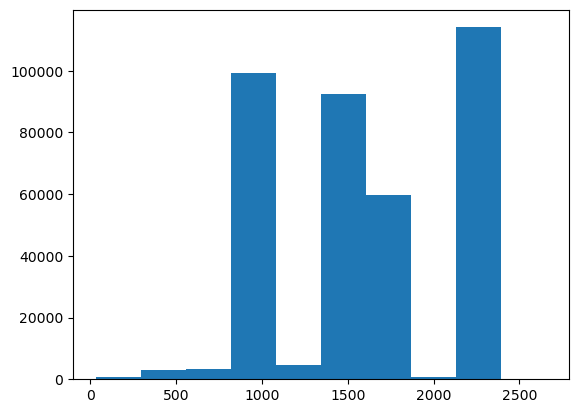

In [23]:
plt.hist(x=lens, bins=10)
plt.show()

In [39]:
from Bio import SeqIO
import numpy as np
import random
import matplotlib.pyplot as plt

kmer = 6

In [115]:
labels = {
    "1": "Rotavirus",
    "2": "HIV",
    "3": "Herpesvirales",
    "4": "Dengue",
    "5": "HepatitisB",
    "6": "Alphainfluenza"
}
vocab = set()

alls = {}
maxl = 0
for j in range(1, 7):
    
    seqpath = "Data/sequences{}.fasta".format(j)
    fasta_sequences = SeqIO.parse(open(seqpath),'fasta')
    seqarr = []
    lens = []

    for fasta in fasta_sequences:
        id, sequence = fasta.id, str(fasta.seq)
        
        if len(sequence) <= 2000:
            seqarr.append(sequence)
            lens.append(len(sequence))
            
    random.shuffle(seqarr)
    seqarr = seqarr[0:11805]
    sentences = []
    for seq in seqarr:

        seqword = []
        for i in range(1, len(seq) - kmer):
            if(len(seq[i: i + 6]) == 6):
                seqword.append(seq[i: i + 6])
            
        if len(seqword) > maxl:
            maxl = len(seqword)
        vocab = vocab | set(seqword)
        sentences.append(seqword)
    alls[str(j)] = sentences
        
print(len(vocab))
print(alls.keys())

44152
dict_keys(['1', '2', '3', '4', '5', '6'])


In [123]:
embedding = nn.Embedding(52, 8)
input = torch.LongTensor([[51, 1, 4, 2, 1, 1], [1, 4, 2, 1, 1, 4]])
embedding(input)

tensor([[[-0.4844, -0.9287, -0.3268, -0.3945, -1.0876, -0.6613, -0.1898,
           0.6450],
         [-2.2579, -1.2972, -0.9011,  0.7067, -2.0735, -0.7316,  1.3920,
          -1.8237],
         [-0.9743,  1.7252, -0.4042,  1.0655, -1.3040, -2.2441,  1.5794,
           1.0502],
         [-2.3836,  0.0443,  0.5473,  0.5508, -0.0886, -0.5879,  0.5406,
          -0.0731],
         [-2.2579, -1.2972, -0.9011,  0.7067, -2.0735, -0.7316,  1.3920,
          -1.8237],
         [-2.2579, -1.2972, -0.9011,  0.7067, -2.0735, -0.7316,  1.3920,
          -1.8237]],

        [[-2.2579, -1.2972, -0.9011,  0.7067, -2.0735, -0.7316,  1.3920,
          -1.8237],
         [-0.9743,  1.7252, -0.4042,  1.0655, -1.3040, -2.2441,  1.5794,
           1.0502],
         [-2.3836,  0.0443,  0.5473,  0.5508, -0.0886, -0.5879,  0.5406,
          -0.0731],
         [-2.2579, -1.2972, -0.9011,  0.7067, -2.0735, -0.7316,  1.3920,
          -1.8237],
         [-2.2579, -1.2972, -0.9011,  0.7067, -2.0735, -0.7316,  1.3

In [116]:
vocab = sorted(vocab)
vocab_list = list(vocab)    

In [126]:
t = torch.ones(6,1900).to(torch.int64)
emb = nn.Embedding(3000, 4)
emb(t).size()

torch.Size([6, 1900, 4])

In [119]:
for i in alls:
    print(i)
    j = 0
    arr = np.zeros((11805, maxl), dtype = int)
    for sentence in alls[i]:
        k = 0
        for word in sentence:
            idx = vocab_list.index(word) + 1
            arr[j][k] = idx
            k += 1
        j += 1
        
    print('bla')
    np.random.shuffle(arr)
    train = arr[0:8263]
    val = arr[8263:10034]
    test = arr[10034:]

    np.save("Data/Train/" + i + "/1.npy", train)
    np.save("Data/Val/" + i + "/2.npy", val)
    np.save("Data/Test/" + i + "/3.npy", test)

1


KeyboardInterrupt: 